In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 


VGG16

In [ ]:
# first we need to get VGG16 layer from https://keras.io/api/applications/vgg/


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
image_size = [224,224]

train_data = '/content/drive/MyDrive/dataset/training_set'


In [ ]:
vgg16 = VGG16(input_shape = image_size + [3] , weights = 'imagenet' , include_top = False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# make sure not to update the weights

for i in vgg16.layers:
  i.trainable = False

In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Activation,Conv2D,MaxPool2D
from tensorflow.keras.activations import sigmoid,softmax,relu



In [ ]:
# create flatten layer 
x = Flatten()(vgg16.output)

In [ ]:
predict = Dense(3 , activation = 'softmax')(x) # output layer 


In [ ]:
from tensorflow.keras.models import Model


In [ ]:
model = Model(inputs = vgg16.inputs , outputs = predict)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
generator = ImageDataGenerator(
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255,
)

In [ ]:
train_data = generator.flow_from_directory(train_data , target_size = image_size ,class_mode = 'categorical' , batch_size = 32)


Found 8097 images belonging to 3 classes.


In [ ]:
from glob import glob 


In [ ]:
train_data.classes[4000:8000]

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [ ]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['Accuracy'])

In [ ]:
model.fit(train_data,epochs = 1)

254/254 [==============================] - 1583s 6s/step - loss: 0.3846 - Accuracy: 0.8481


In [ ]:
import matplotlib.pyplot as plt 
import cv2

In [ ]:
labels = ['phe' , 'cat' , 'dog']

In [ ]:
def fun(path):
    
    image = plt.imread(path)
    image = cv2.resize(image,(224,224))

    image = np.array(image) / 255.0
 
    image = np.expand_dims(image , axis = 0)
    result = model.predict(image)
    print(result)
    res = np.argmax(result , axis = 1)
    print(res)
    print(labels[res[0]])
    image1 = plt.imread(path)
    plt.imshow(image1)

1/1 [==============================] - 0s 20ms/step
[[8.21461228e-08 1.09334014e-01 8.90665948e-01]]
[2]
dog


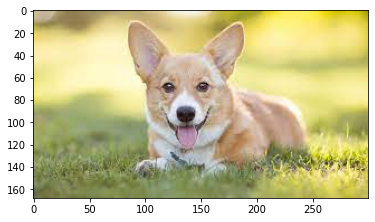

In [ ]:
fun('/content/download (5).jpg')